In [210]:
import numpy as np
import numpy.linalg as la
from scipy.sparse import spdiags
import matplotlib.pyplot as plt

Qustion 2

a)
we will solve problem (1) using $l_2$ norm, the solution is:

$ \hat{x} = $

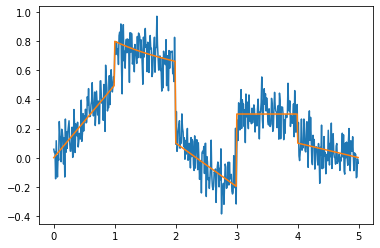

In [489]:
x = np.arange(0,5, 0.01)
n = np.size(x)
one = int(n / 5)
f = np.zeros(x.shape)
f[0:one] = 0.0 + 0.5*x[0:one]
f[(one):2*one] = 0.8 - 0.2*np.log(x[100:200]);
f[(2*one):3*one] = 0.7 - 0.3*x[(2*one):3*one];
f[(3*one):4*one] = 0.3
f[(4*one):(5*one)] = 0.5 - 0.1*x[(4*one):(5*one)];
G = spdiags([-np.ones(n), np.ones(n)], np.array([0, 1]), n-1,n)
etta = 0.1*np.random.randn(np.size(x));
y = f + etta
plt.figure(); plt.plot(x,y); plt.plot(x,f); plt.show()

section (a) - solution using LS with l2 norm

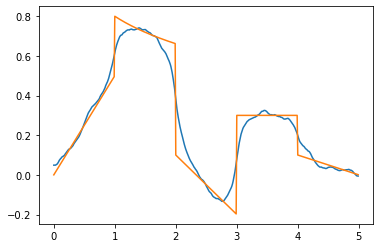

In [491]:
x_ls = np.array(la.inv(np.identity(n) + 80*G.transpose()@G) @ y)
plt.figure(); plt.plot(x,x_ls.transpose());plt.plot(x,f); plt.show()

section (b) - solving (1) using IRLS



In [492]:
G = np.array(G.toarray())

In [493]:
epsilon = 0.001
def get_w(i,x_k):
    return 1/(np.abs(np.inner(G[i],x_k)) + epsilon)

In [494]:
def IRLS(num_iter = 10 , get_w = get_w):
    errors = []
    W = np.identity(G.shape[0])
    for i in range(num_iter):
        x_curr = la.inv(np.identity(n) + 1/2*((G.transpose() @ W) @ G)) @ y
        errors.append(x_curr)
        W = np.diag([get_w(i,x_curr) for i in range(len(W))])
    return x_curr, errors

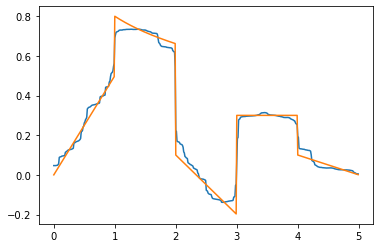

In [495]:
sol, errors = IRLS(10)
plt.figure(); plt.plot(x,sol);plt.plot(x,f); plt.show()



In [366]:
def txt_to_vector():
    with open('Covid-19-USA.txt') as txt:
        return np.array([int(line.rstrip()) for line in txt])


x = np.array([i for i in range(1, 100)])
y = txt_to_vector()
f = lambda theta: np.array(theta[0] * np.exp((-1) * theta[1] * np.square(x - theta[2])))
F = lambda theta: (1 / 2) * np.square(la.norm(f(theta) - y))


In [367]:
def grad_f(theta,y):
    x = np.array([i for i in range(1,100)])
    f_theta = f(theta)
    J_t = np.array([np.exp( (-1) * theta[1] * np.square(x- theta[2])),
           theta[0] * np.exp( (-1) * theta[1] * np.square(x- theta[2])) * (-1) * np.square(x- theta[2]),
           theta[0] * np.exp( (-1) * theta[1] * np.square(x- theta[2])) * (2 * (x - theta[2]) * theta[1])])
    return  J_t @ (f_theta - y) , J_t

In [368]:
def armijo_lineserach(theta_curr,F, gradient , d):
    alpha = 1; beta = 0.5; c = 1e-4;
    for i in range(100):
        if F(theta_curr + alpha * d) <= F(theta_curr) + c * alpha * (gradient @ d) :
            return alpha
        else:
            alpha = beta * alpha
    print('finished all iter didnt find alpha')
    return alpha

In [425]:

def SD(theta_start, grad_F,y):
    alpha = 0.5
    theta_curr = theta_start
    errors = []
    for i in range(100):
        curr_grad = grad_F(theta_curr,y)[0]
        alpha = armijo_lineserach(theta_curr,F, curr_grad, - (curr_grad))
        theta_curr = theta_curr - alpha * curr_grad
        errors.append(F(theta_curr))
        if len(errors) > 2 and np.abs(errors[-1] - errors[-2]) < 1e-3:
            return theta_curr, erros

    return theta_curr, errors

In [426]:
def LM(theta_start, grad_F,y):
    theta_curr = theta_start
    erros = []
    for i in range(100):
        curr_grad , J_T= grad_F(theta_curr,y)
        d = (-1) * (la.inv(J_T @ J_T.transpose() + 0.5 * np.identity(3)) @ curr_grad )
        alpha = armijo_lineserach(theta_curr,F, curr_grad, d)
        theta_curr = theta_curr + alpha * d
        erros.append(F(theta_curr))
        if len(erros) > 2 and np.abs(erros[-1] - erros[-2]) < 1e-3:
            return theta_curr, erros
    
    return theta_curr,erros

C:\Users\nonom\AppData\Local\Temp\ipykernel_28116\3935139851.py:8: RuntimeWarning: overflow encountered in exp
  f = lambda theta: np.array(theta[0] * np.exp((-1) * theta[1] * np.square(x - theta[2])))
C:\Users\nonom\AppData\Local\Temp\ipykernel_28116\3935139851.py:8: RuntimeWarning: overflow encountered in multiply
  f = lambda theta: np.array(theta[0] * np.exp((-1) * theta[1] * np.square(x - theta[2])))


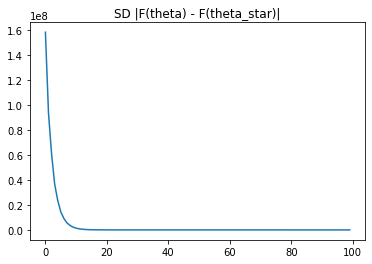

In [428]:
teta_star,err_vector = SD(np.array([1000000,0.001,110]),grad_f,y)
F_teta_star = F(teta_star)
# print(err_vector)
plt.plot([np.abs(F_teta_star - err_vector[i]) for i in range(len(err_vector))])
plt.title("SD |F(theta) - F(theta_star)|")
plt.show()
# plt.figure(); plt.plot(x,f(teta_star)); plt.plot(x,y); plt.show()

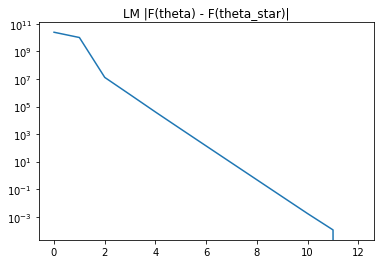

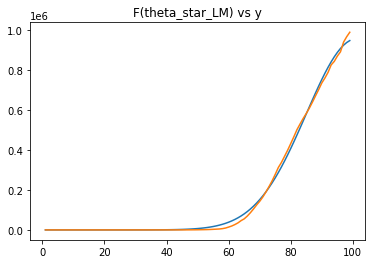

In [432]:
teta_star,err_vector = LM(np.array([1000000,0.001,110]),grad_f,y)
F_teta_star = F(teta_star)
plt.semilogy([np.abs(F_teta_star - err_vector[i]) for i in range(len(err_vector))])
plt.title("LM |F(theta) - F(theta_star)|")
plt.show()
plt.figure(); plt.plot(x,f(teta_star)); plt.plot(x,y); plt.title("F(theta_star_LM) vs y") ;plt.show()

iter num 0
alpha=0.5
iter num 1
alpha=1
iter num 2
alpha=1
iter num 3
alpha=1
iter num 4
alpha=1
iter num 5
alpha=1
iter num 6
alpha=1
iter num 7
alpha=1
iter num 8
alpha=1
iter num 9
alpha=1
iter num 10
alpha=1
iter num 11
alpha=1
iter num 12
alpha=1
[9.56035466e+05 1.88348054e-03 1.01274160e+02]
len(err_vector)=13


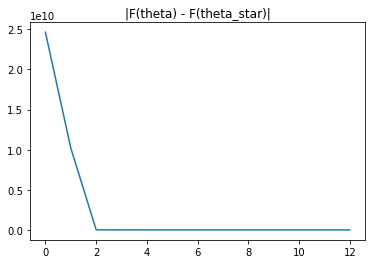

In [371]:
teta_star,err_vector = LM(np.array([1000000,0.001,110]),grad_f,y)
F_teta_star = F(teta_star)
print(teta_star)
print(f'{len(err_vector)=}')
# plt.semilogy([np.abs(F_teta_star - F(err_vector[i])) for i in range(len(err_vector))])
plt.plot([np.abs(F_teta_star - F(err_vector[i])) for i in range(len(err_vector))])
plt.title("|F(theta) - F(theta_star)|")
plt.show()
# plt.figure(); plt.plot(x,f(teta_star)); plt.plot(x,y); plt.show()


In [458]:
sigmoid = lambda num  : 1 / (1 + np.exp(-num))

In [459]:
def objective_func_grad_hessian(X , y):
    c1 = y
    c2 = 1 - y
    m = len(X)
    objective_func = lambda w : ((-1)/m) * (c1 @ (np.array([np.log(sigmoid(X[i]@w)) for i in range(m)])) +
                                            c2 @ (np.array([np.log(1 - sigmoid(X[i] @ w)) for i in range(m)])))
    gradient = lambda w: (1/m) * (X.transpose() @ (sigmoid(X @ w) - c1))
    
    D = lambda w: np.diag(np.multiply(np.array(sigmoid(X @ w)), (1 - np.array(sigmoid(X @ w)))))
    
    hessian = lambda w : (1/m * (X.transpose() @ D(w) @ X)) + 0.01*np.identity(len(X[0]))

    return objective_func,gradient,hessian,D

In [460]:
def SD2(w_start, grad_F, F_train):
    alpha = 1
    w_curr = w_start
    train_errors = []
    test_errors = []
    for i in range(100):
        curr_grad = grad_F(w_curr)
        alpha = armijo_lineserach(w_curr, F_train, curr_grad, -curr_grad)
        w_curr = w_curr - alpha * curr_grad
        train_errors.append(w_curr)
    return w_curr, train_errors

In [476]:
objective_func, gradient, hessian, D = objective_func_grad_hessian(x_train_0_1, y_train_0_1)
objective_func_test, gradient_test, hessian_test, D_test = objective_func_grad_hessian(x_test_0_1, y_test_0_1)

m_train = len(x_train_0_1[0])


In [ ]:
w_star, errors = SD2(np.zeros(m_train),gradient,objective_func)

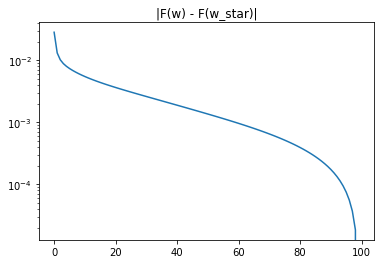

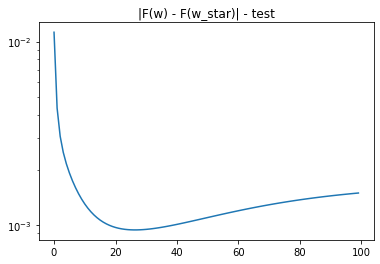

In [478]:
F_w_star_train = objective_func(w_star)
F_w_star_test = objective_func_test(w_star)
plt.semilogy([np.abs(F_w_star_train - objective_func(errors[i])) for i in range(len(errors))])
plt.title("|F(w) - F(w_star)|")
plt.show()
plt.semilogy([np.abs(objective_func_test(errors[i])) for i in range(len(errors))])
plt.title("|F(w) - F(w_star)| - test")
plt.show()

In [485]:
for i in range(len(y_train_8_9)):
    if(y_train_8_9[i] == 9):
        y_train_8_9[i] = 1
    else:
        y_train_8_9[i] = 0
        
for i in range(len(y_test_8_9)):
    if(y_test_8_9[i] == 9):
        y_test_8_9[i] = 1
    else:
        y_test_8_9[i] = 0
        

objective_func, gradient, hessian, D = objective_func_grad_hessian(x_train_8_9, y_train_8_9)
objective_func_test, gradient_test, hessian_test, D_test = objective_func_grad_hessian(x_test_8_9, y_test_8_9)

m_train = len(x_train_8_9[0])
m_test = len(x_test_8_9[0])


In [486]:
w_star, errors = SD2(np.zeros(m_train),gradient,objective_func)

C:\Users\nonom\AppData\Local\Temp\ipykernel_28116\4223275591.py:6: RuntimeWarning: divide by zero encountered in log
  c2 @ (np.array([np.log(1 - sigmoid(X[i] @ w)) for i in range(m)])))
C:\Users\nonom\AppData\Local\Temp\ipykernel_28116\4223275591.py:6: RuntimeWarning: invalid value encountered in matmul
  c2 @ (np.array([np.log(1 - sigmoid(X[i] @ w)) for i in range(m)])))


0.04601896999726741
0.051882837299514976


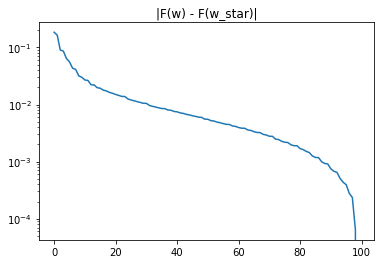

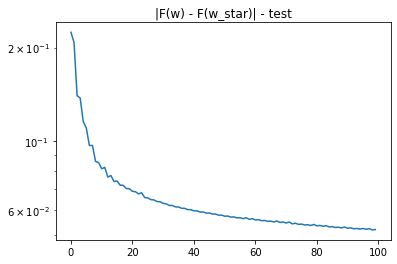

In [487]:
F_w_star_train = objective_func(w_star)
print(F_w_star_train)
F_w_star_test = objective_func_test(w_star)
print(F_w_star_test)
plt.semilogy([np.abs(F_w_star_train - objective_func(errors[i])) for i in range(len(errors))])
plt.title("|F(w) - F(w_star)|")
plt.show()
plt.semilogy([np.abs(objective_func_test(errors[i])) for i in range(len(errors))])
plt.title("|F(w) - F(w_star)| - test")
plt.show()

In [138]:
w_star = errors[20]

In [222]:
def LM2(w_start, grad_F, hessian_F):
    w_curr = w_start
    erros = []
    for i in range(100):
        print(f'iter num {i}')
        curr_grad = grad_F(w_curr)
        J = hessian_F(w_curr)
        d = (-1) * (la.inv(J.transpose() @ J + 0.5 * np.identity(len(J.transpose()))) @ curr_grad )
        alpha = armijo_lineserach(w_curr,F, curr_grad, d)
        print(f'{alpha=}')
        w_curr = w_curr + alpha * d
        np.clip(w_curr,-1,1)
        erros.append(w_curr)

    return w_curr,erros

In [ ]:
w_star_LM, errors_LM = LM2(np.zeros(m),gradient,hessian)

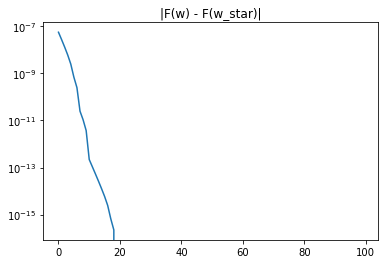

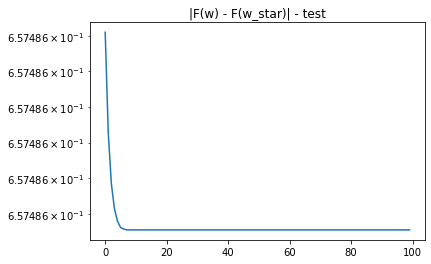

In [225]:
F_w_star_LM_train = objective_func(w_star_LM)
F_w_star_LM_test = objective_func_test(w_star_LM)
plt.semilogy([np.abs(F_w_star_LM_train - objective_func(errors_LM[i])) for i in range(len(errors_LM))])
plt.title("|F(w) - F(w_star)|")
plt.show()
plt.semilogy([np.abs(objective_func_test(errors_LM[i])) for i in range(len(errors_LM))])
plt.title("|F(w) - F(w_star)| - test")
plt.show()

TypeError: 'numpy.ndarray' object is not callable

In [236]:
def gradient_test(f, grad, m):
    x = np.random.rand(m)
    epsilon = 0.01
    d = np.random.rand(m)
    O = np.abs(f(x+epsilon*d) - f(x))
    O_2 = np.abs(f(x+epsilon*d) - f(x) - ((epsilon*d) @ grad(x)))
    return O, O_2

In [444]:
objective_func, gradient, hessian, D = objective_func_grad_hessian(x_train_0_1, y_train_0_1)
m = len(x_train_0_1[0])

O,O_2 = gradient_test(objective_func,gradient, m)
print(f'{O=}, {O_2=}')

O=0.017999035547869857, O_2=0.00017892945406735097


In [442]:
print(float(6e-3))

0.006


In [456]:
def J_test(grad, hessian, m):
    x = np.random.rand(m)
    epsilon = 0.01
    d = np.random.rand(m)
    O = la.norm(grad(x+epsilon*d) - grad(x))
    O_2 = la.norm(grad(x+epsilon*d) - grad(x) - ((epsilon*d) @ hessian(x)))
    return O, O_2

In [457]:
objective_func, gradient, hessian, D = objective_func_grad_hessian(x_train_0_1, y_train_0_1)
m = len(x_train_0_1[0])

O,O_2 = J_test(gradient,hessian, m)
print(f'{O=}, {O_2=}')

O=0.031265576181455534, O_2=0.0015956681052959802


In [449]:
#
# This is a sample Notebook to demonstrate how to read "MNIST Dataset"
#
import numpy as np
import struct
from array import array
from os.path import join
import os
import random
import matplotlib.pyplot as plt


#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            meanval = np.mean(img)
            stdval = np.std(img)
            img = (img - meanval) / (stdval + 0.1)
            images[i][:] = img
            
        
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        
        
        
        x_train_0_1 = []
        y_train_0_1 = []
        x_test_0_1 = []
        y_test_0_1 = []
        
        x_train_8_9 = []
        y_train_8_9 = []
        x_test_8_9 = []
        y_test_8_9 = []
        
        for i,y in enumerate(y_train):
            if(y in [0,1]):
                x_train_0_1.append(np.array(x_train[i]).flatten())
                y_train_0_1.append(y)
            if(y in [8,9]):
                x_train_8_9.append(np.array(x_train[i]).flatten())
                y_train_8_9.append(y)
                
        for i,y in enumerate(y_test):
            if(y in [0,1]):
                x_test_0_1.append(np.array(x_test[i]).flatten())
                y_test_0_1.append(y)
            if(y in [8,9]):
                x_test_8_9.append(np.array(x_test[i]).flatten())
                y_test_8_9.append(y)
            

        return (np.array(x_train_0_1), np.array(y_train_0_1)),(np.array(x_test_0_1), np.array(y_test_0_1)) \
              ,(np.array(x_train_8_9), np.array(y_train_8_9)),(np.array(x_test_8_9), np.array(y_test_8_9))  
		
		
#
# Verify Reading Dataset via MnistDataloader class
#
#
# Set file paths based on added MNIST Datasets
#
cwd = os.getcwd()
input_path = cwd + '\MNIST'
training_images_filepath = join(input_path, 'train-images.idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels.idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images.idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels.idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1
    plt.show()
#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train_0_1, y_train_0_1),(x_test_0_1, y_test_0_1),(x_train_8_9, y_train_8_9),(x_test_8_9, y_test_8_9) = mnist_dataloader.load_data()


(1983, 784)